# Tensorflow-Classification

In [18]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

#### Import Data and Get Insights

In [28]:
diabetes = pd.read_csv('data/pima-indians-diabetes.csv')

In [29]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [30]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [31]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps','Insulin', 'BMI', 'Pedigree']


#### Normalize Data

In [32]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [33]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


#### Define Features

In [34]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [35]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A','B','C', 'D'])


In [36]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

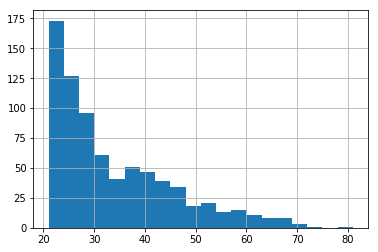

In [37]:
diabetes['Age'].hist(bins=20)

In [38]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60, 70, 80])

In [39]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group, age_bucket]

In [40]:
# train test split
x_data = diabetes.drop('Class', axis=1)

In [41]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [42]:
labels = diabetes['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

#### Train and Test Split

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

#### Creating Input Functions and Linear Classifier Model

In [45]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [46]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp40af5jst', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [47]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp40af5jst/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 527.036
INFO:tensorflow:loss = 4.829702, step = 101 (0.196 sec)
INFO:tensorflow:global_step/sec: 601.146
INFO:tensorflow:loss = 5.300791, step = 201 (0.168 sec)
INFO:tensorflow:global_step/sec: 579.41
INFO:tensorflow:loss = 5.491354, step = 301 (0.170 sec)
INFO:tensorflow:global_step/sec: 573.161
INFO:tensorflow:loss = 8.033916, step = 401 (0.176 sec)
INFO:tensorflow:global_step/sec: 570.501
INFO:tensorflow:loss = 4.194273, step = 501 (0.174 sec)
INFO:tensorflow:global_step/sec: 541.754
INFO:tensorflow:loss = 5.0951347, step = 601 (0.185 sec)
INFO:tensorflow:global_step/sec: 547.192
INFO:tensorflow:loss = 2.4572752, step = 701 (0.180 sec)
INFO:tensorflow:global_step/sec: 622.884
INFO:tensorflow:loss = 6.982945, step = 801 (0.163 sec)
INFO:tensorflow:global_step/sec: 593.74
INFO:tensorflow:loss =

In [48]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [49]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-01-21-15:56:41
INFO:tensorflow:Restoring parameters from /tmp/tmp40af5jst/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-01-21-15:56:41
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.73593074, accuracy_baseline = 0.64935064, auc = 0.80156374, auc_precision_recall = 0.6403131, average_loss = 0.5323428, global_step = 1000, label/mean = 0.35064936, loss = 5.1238, prediction/mean = 0.39880055


In [50]:
results

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80156374,
 'auc_precision_recall': 0.6403131,
 'average_loss': 0.5323428,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.1238,
 'prediction/mean': 0.39880055}

In [51]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [52]:
predictions = model.predict(pred_input_func)

In [53]:
my_pred = list(predictions)
my_pred

INFO:tensorflow:Restoring parameters from /tmp/tmp40af5jst/model.ckpt-1000


[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.5673966], dtype=float32),
  'logits': array([0.27123713], dtype=float32),
  'probabilities': array([0.4326034, 0.5673966], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6633401], dtype=float32),
  'logits': array([0.67821467], dtype=float32),
  'probabilities': array([0.33665988, 0.6633401 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.39582428], dtype=float32),
  'logits': array([-0.42289478], dtype=float32),
  'probabilities': array([0.60417575, 0.39582425], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.39849454], dtype=float32),
  'logits': array([-0.41174185], dtype=float32),
  'probabilities': array([0.60150546, 0.3984945 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=ob

#### Creating Neural Network Classifier Model

In [58]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [59]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_col, age_bucket]

In [60]:
input_func2 = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [63]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp4q0ryn91', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [64]:
dnn_model.train(input_fn=input_func2, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp4q0ryn91/model.ckpt.
INFO:tensorflow:loss = 9.927225, step = 1
INFO:tensorflow:global_step/sec: 555.294
INFO:tensorflow:loss = 5.9762807, step = 101 (0.185 sec)
INFO:tensorflow:global_step/sec: 528.789
INFO:tensorflow:loss = 6.6879826, step = 201 (0.186 sec)
INFO:tensorflow:global_step/sec: 559.784
INFO:tensorflow:loss = 3.224975, step = 301 (0.179 sec)
INFO:tensorflow:global_step/sec: 553.957
INFO:tensorflow:loss = 5.2986636, step = 401 (0.181 sec)
INFO:tensorflow:global_step/sec: 599.634
INFO:tensorflow:loss = 6.365974, step = 501 (0.168 sec)
INFO:tensorflow:global_step/sec: 547.355
INFO:tensorflow:loss = 4.138397, step = 601 (0.183 sec)
INFO:tensorflow:global_step/sec: 553.959
INFO:tensorflow:loss = 7.0735903, step = 701 (0.181 sec)
INFO:tensorflow:global_step/sec: 462.641
INFO:tensorflow:loss = 2.888398, step = 801 (0.214 sec)
INFO:tensorflow:global_step/sec: 442.551
INFO:tensorflow:lo

In [65]:
eval_input_func2 = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [66]:
dnn_model.evaluate(eval_input_func2)

INFO:tensorflow:Starting evaluation at 2018-01-21-16:05:59
INFO:tensorflow:Restoring parameters from /tmp/tmp4q0ryn91/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-01-21-16:05:59
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.76623374, accuracy_baseline = 0.64935064, auc = 0.8332098, auc_precision_recall = 0.7023629, average_loss = 0.4841919, global_step = 1000, label/mean = 0.35064936, loss = 4.660347, prediction/mean = 0.38073236


{'accuracy': 0.76623374,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8332098,
 'auc_precision_recall': 0.7023629,
 'average_loss': 0.4841919,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.660347,
 'prediction/mean': 0.38073236}